### Sentiment Review

The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

Objective:
- Understand the Dataset & cleanup (if required).
- Build classification models to predict the ratings of the movie.
- Compare the evaluation metrics of vaious classification algorithms.


**Dataset source:** <br>
- IMDB Movie Ratings Sentiment Analysis: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis

In [5]:
# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

from bs4 import BeautifulSoup
# It helps to remove the accented characters 

import unidecode
import unicodedata
# Importing the NLTK library
import nltk

#nltk.download('omw-1.4')
# # downloading vader lexicon
# nltk.download('vader_lexicon')

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer

import contractions
# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [217]:
#load the dataset
movie = pd.read_csv('movie.csv')

In [218]:
movie=movie.sample(3000)

In [219]:
movie.shape

(3000, 2)

In [220]:
# reset the index
movie.reset_index(drop = True, inplace = True)

In [221]:
df=movie.copy()

In [222]:
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             My wife received tickets for our family to attend the premier of this movie from her employer for free. I only regret the price of the popcorn and the two hours of my life wasted on this garbage film.<br /><br />I own the DVD of the original Mask, and quite enjoyed it. I expected a remake nowhere near the original in production values or writing.. but wasn't prepared for this vulgar pile of trash. Weak acting, poor plot, a bad CGI baby passing gas and urinating in hyper "mask mode".. a woman turned into a giant nose, spewing mucous.. Fun huh? My eight year old son loves movies like Lord of the Rings, Harry Potter and Star Wars. After this was over I asked him what he thought. His exact words; "I hated it. It's like the Scooby Doo movie. They take something good and have to put all that gross stuff in." My twelve year old daughter and wife hated it as well. My wife later told me that my son asker her twice during it if we could leave. He's never done that before. I'm proud of him. Lest you think I'm some kind of puritan, from the groans, and lack of laughter I heard in the theater, I think most of the patrons agreed with me.<br /><br />This film represents everything bad about children's entertainment today, and any positive reviews MUST be from people financially connected with the film.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [223]:
df.tail()

text  \
2995  Whenever I hear a movie being touted because it has no sex, violence, bad language, special effects, and so on, my b.s. detector goes off. Usually, a movie like that is sentimental hogwash which panders to people who don't want anything to surprise them, but to affirm how superior they are to us craven folk. So when David Lynch's THE STRAIGHT STORY began getting those kinds of reviews, I was apprehensive, especially since I was not a fan of his other "uplifting" story, THE ELEPHANT MAN. For all the stunning images and the good acting in that film, it seemed more interested in preaching to us than inspiring us.<br /><br />I needn't have worried. THE STRAIGHT STORY is an honest movie rather than a saccharine one. Most of that is due to the fact that Lynch and writers John Roach and Mary Sweeney tell it straight and simple for the most part. There are a couple of homilies by Straight I could have done without, and the shots of grain being harvested are repeated a little too much, but those are only quibbles. There's no heavy-handed message, no sentimental strings to jerk our emotions, and no condescension towards us and its characters. Instead, they depend on the story to build its own power, and it does, so by the final scene, we are genuinely moved.<br /><br />Of course, casting Richard Farnsworth adds realism to the part. He really is someone who looks like he's lived through a lot but still perseveres, and except for those homilies, the desire he has to get back together with his brother doesn't seem overly sentimental, because you can sense here is someone who's lived too long and seen too much to be driven by anger for long. And he knows his time is running out, so he wants to make some peace, not only with his brother, but with his life. Sissy Spacek also does fine, unmannered work as Straight's daughter. And although I am a city and suburban boy, the Iowa and Wisconsin landscape are beautifully shot, making me want at least to visit some day.   
2996                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       This series is vastly underrated. Like many others, I came upon Farscape after the series had been cancelled. Bought Season 1 and was surprised to find a smartly written drama infused with a balanced mix of suspense, romance, wit and, of course, sci-fi. Right off the bat it got a 10 for being the first series or movie to satisfy us how our hero - and every alien with whom he comes in contact - speaks English! Okay, a few others have skirted the issue, but Farscape did it the best. The point is, the writers pay close attention to detail to make the show as believable as possible.<br /><br />With so much bad programming out there, it's a shame that balanced, entertaining series such as Farscape don't get enough exposure and recognition to stay in production. While we enjoy the four seasons and, thankfully, the four-hour miniseries, maybe we can make enough noise to convince the producers to continue the show.   
2997      

- Here, a sentiment value of 0 is negative, and 1 represents a positive sentiment.

In [224]:
df.shape

(3000, 2)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [226]:
df.duplicated().sum()

2

In [227]:
df.drop_duplicates(keep='first', inplace=True)

In [228]:
df.duplicated().sum()

0

In [229]:
df.reset_index(drop = True, inplace = True)

### Exploratory Data Analysis

In [230]:
# Creating word cloud for negative reviews
def create_wordcloud(data, sent_value):
    reviews = data[data['label'] == sent_value]

    words = ' '.join(reviews['text'])

    #cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(words)
    
    plt.figure(1, figsize = (12, 12))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show()

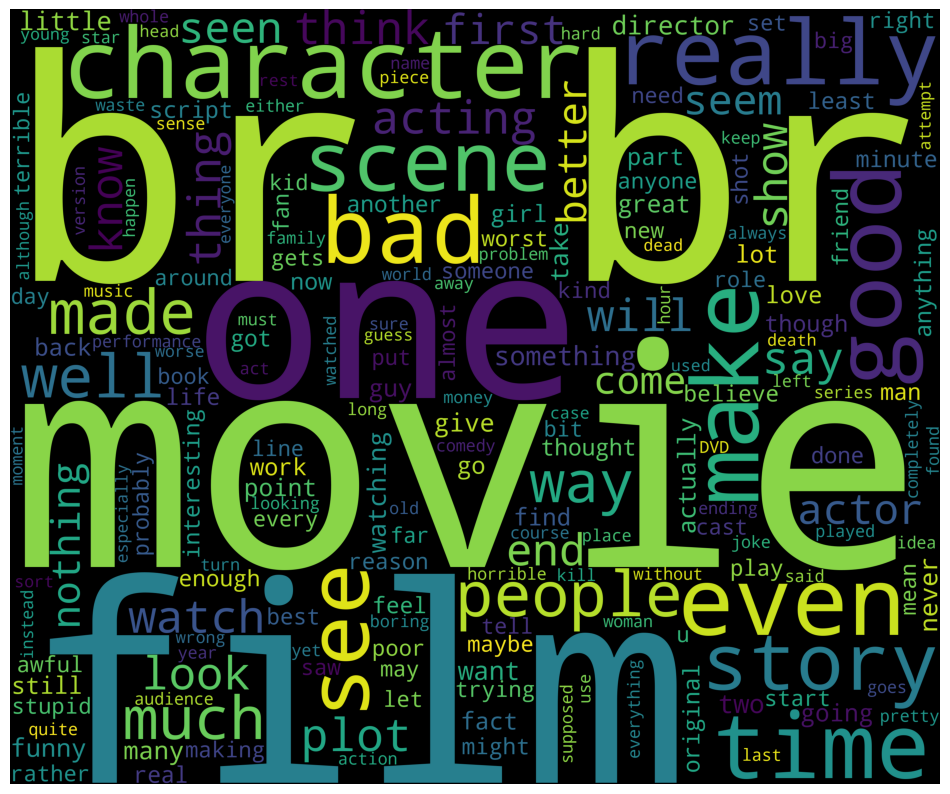

In [231]:
#Visualization of negative reviews
create_wordcloud(df, 0)

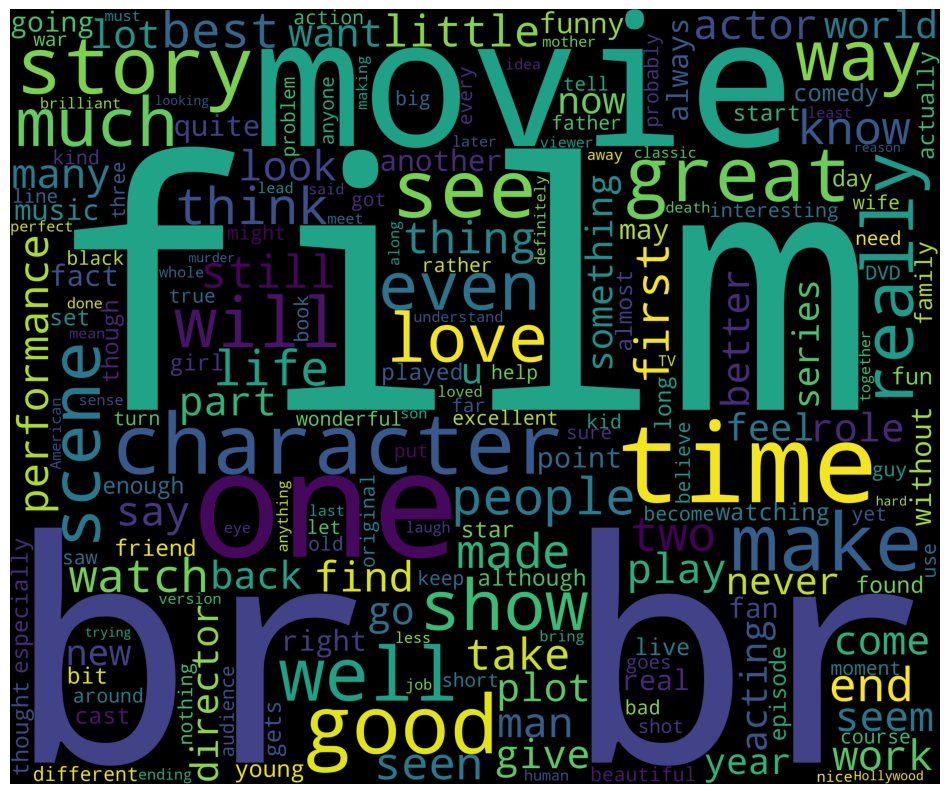

In [232]:
#Visualization of positive reviews
create_wordcloud(df, 1)

In [233]:
df['label'].value_counts()

label
0    1509
1    1489
Name: count, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


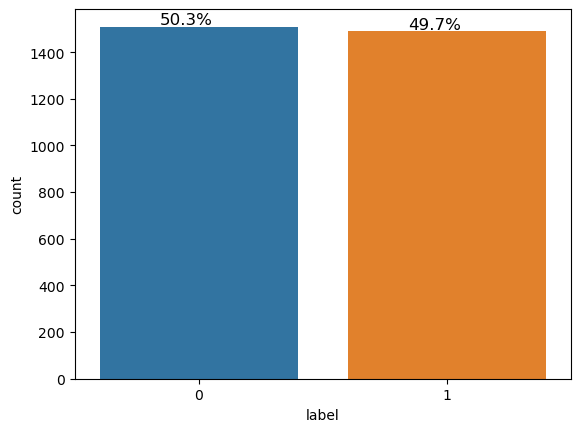

In [234]:
# Plot the distribution of the class label
def bar_plot(data, feature):
    # Creating the countplot
    plot = sns.countplot(x = feature, data = data)
    
    # Finding the length the whole data
    total = len(data)
    
    # Creating the percentages to each label in the data
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points")
    plt.show()
    
bar_plot(df,'label')

### Text Preprocessing

#### Fix contractions

In [235]:
#Fix contractions
def fix_contractions (text):
    return contractions.fix(text)

df['text']= df['text'].apply(lambda x: fix_contractions(x))

#### Remove HTML tags

In [236]:
def remove_html (text):
    soup=BeautifulSoup(text)
    return soup.get_text()

In [237]:
df['text']= df['text'].apply(lambda x: remove_html(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_22916\2993710170.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text)


#### Remove Special characters

In [238]:
def remove_special_chars(text):
    text=re.sub('[^a-zA-Z]', ' ', text)
    return text

df['text']= df['text'].apply(lambda x: remove_special_chars(x))

In [239]:
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            My wife received tickets for our family to attend the premier of this movie from her employer for free  I only regret the price of the popcorn and the two hours of my life wasted on this garbage film I own the DVD of the original Mask  and quite enjoyed it  I expected a remake nowhere near the original in production values or writing   but was not prepared for this vulgar pile of trash  Weak acting  poor plot  a bad CGI baby passing gas and urinating in hyper  mask mode    a woman turned into a giant nose  spewing mucous   Fun huh  My eight year old son loves movies like Lord of the Rings  Harry Potter and Star Wars  After this was over I asked him what he thought  His exact words   I hated it  It is like the Scooby Doo movie  They take something good and have to put all that gross stuff in   My twelve year old daughter and wife hated it as well  My wife later told me that my son asker her twice during it if we could leave  He is never done that before  I am proud of him  Lest you think I am some kind of puritan  from the groans  and lack of laughter I heard in the theater  I think most of the patrons agreed with me This film represents everything bad about children s entertainment today  and any positive reviews MUST be from people financially connected with the film    
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

#### Convert the data to Lowercase

In [240]:
df['text']= df['text'].apply(lambda x: x.lower())

#### Tokenization

In [241]:
df['text']= df['text'].apply(lambda x: nltk.word_tokenize(x))

In [242]:
df.head()

text  \
0                                                           [my, wife, received, tickets, for, our, family, to, attend, the, premier, of, this, movie, from, her, employer, for, free, i, only, regret, the, price, of, the, popcorn, and, the, two, hours, of, my, life, wasted, on, this, garbage, film, i, own, the, dvd, of, the, original, mask, and, quite, enjoyed, it, i, expected, a, remake, nowhere, near, the, original, in, production, values, or, writing, but, was, not, prepared, for, this, vulgar, pile, of, trash, weak, acting, poor, plot, a, bad, cgi, baby, passing, gas, and, urinating, in, hyper, mask, mode, a, woman, turned, into, a, giant, nose, spewing, mucous, fun, ...]   
1                                                         [this, was, a, hit, in, the, south, by, southwest, sxsw, film, festival, in, austin, last, year, and, features, a, fine, cast, headed, up, by, e, r, s, gloria, reuben, and, a, scenery, chewing, john, glover, though, shot, on, a, small, budget, in, nyc, the, film, looks, and, sounds, fabulous, and, takes, us, on, a, behind, the, scenes, whirl, through, the, rehearsal, and, mounting, of, what, actors, call, the, scottish, play, as, a, reference, to, the, word, macbeth, is, thought, to, bring, on, the, play, s, ancient, curse, the, acting, company, exhibits, all, the, emotions, of, the, play, itself, lust, jealousy, ...]   
2  [a, special, day, ettore, scola, italy, canada, every, once, in, a, while, you, come, across, a, film, that, really, touches, a, nerve, this, one, offers, a, very, simple, premise, almost, flawlessly, executed, in, every, way, and, incredibly, moving, at, the, same, time, it, is, surprising, ettore, scola, s, una, giornate, particulare, is, relatively, unheralded, even, hated, by, some, critics, time, out, calls, it, rubbish, and, leonard, maltin, somewhat, milder, pleasant, but, trifling, i, disagree, not, only, because, this, film, is, deeply, moving, but, within, its, simple, story, it, shows, us, more, insights, about, daily, life, in, fascist, italy, than, most, ...]   
3                                                           [man, what, a, scam, this, turned, out, to, be, not, because, it, was, not, any, good, as, i, was, not, really, expecting, anything, from, it, but, because, i, was, misled, by, the, dvd, sleeve, which, ignorantly, paraded, its, stars, as, being, stuart, whitman, stella, stevens, and, tony, bill, sure, enough, their, names, did, not, appear, in, the, film, s, opening, credits, much, less, themselves, in, the, rest, of, it, as, it, turned, out, the, only, movie, which, connects, those, three, actors, together, is, the, equally, obscure, las, vegas, lady, but, what, that, one, has, to, do, with, the, crater, lake, ...]   
4                                     [i, hope, from, his, seat, on, heaven, s, comedic, throne, spike, milligan, can, see, and, can, enjoy, this, film, as, terence, ryan, and, ken, tuohy, have, taken, a, book, that, the, author, himself, said, writing, it, nearly, turned, me, mad, into, a, joy, to, watch, the, film, tells, the, story, of, the, irish, town, of, puckoon, and, the, problems, befallen, upon, it, when, the, partition, between, northern, ireland, and, the, republic, is, drawn, up, cutting, its, way, through, the, centre, of, the, village, and, more, worringly, through, the, middle, of, the, churchyard, this, causes, some, deceased, buried, in, the, catholic, ...]   

   label  
0      0  
1      1  
2      1  
3      0  
4      1

#### Stopwords

In [243]:
def remove_stopwords (row):
    stop_words = stopwords.words('english')
    words=[word for word in row if word not in stop_words]
    return words
df['text']= df['text'].apply(lambda x: remove_stopwords(x))
df.head()

text  \
0                                                                                                                 [wife, received, tickets, family, attend, premier, movie, employer, free, regret, price, popcorn, two, hours, life, wasted, garbage, film, dvd, original, mask, quite, enjoyed, expected, remake, nowhere, near, original, production, values, writing, prepared, vulgar, pile, trash, weak, acting, poor, plot, bad, cgi, baby, passing, gas, urinating, hyper, mask, mode, woman, turned, giant, nose, spewing, mucous, fun, huh, eight, year, old, son, loves, movies, like, lord, rings, harry, potter, star, wars, asked, thought, exact, words, hated, like, scooby, doo, movie, take, something, good, put, gross, stuff, twelve, year, old, daughter, wife, hated, well, wife, later, told, son, asker, twice, could, leave, never, ...]   
1                                                                                  [hit, south, southwest, sxsw, film, festival, austin, last, year, features, fine, cast, headed, e, r, gloria, reuben, scenery, chewing, john, glover, though, shot, small, budget, nyc, film, looks, sounds, fabulous, takes, us, behind, scenes, whirl, rehearsal, mounting, actors, call, scottish, play, reference, word, macbeth, thought, bring, play, ancient, curse, acting, company, exhibits, emotions, play, lust, jealousy, rage, suspicion, bit, fun, well, games, begin, accomplished, actor, replaced, lead, role, well, known, pretty, face, tv, soap, opera, scene, order, draw, bigger, crowds, green, eyed, monster, takes, drama, unfolds, nicely, fine, soundtrack, good, performances, around, dvd, includes, director, commentary, deleted, scenes, well]   
2        [special, day, ettore, scola, italy, canada, every, come, across, film, really, touches, nerve, one, offers, simple, premise, almost, flawlessly, executed, every, way, incredibly, moving, time, surprising, ettore, scola, una, giornate, particulare, relatively, unheralded, even, hated, critics, time, calls, rubbish, leonard, maltin, somewhat, milder, pleasant, trifling, disagree, film, deeply, moving, within, simple, story, shows, us, insights, daily, life, fascist, italy, films, seen, cinematography, distinctly, unflashy, even, bit, bland, storyline, straightforward, might, explain, film, relative, unpopularity, considering, late, audiences, exactly, spoiled, great, italian, films, even, stranger, one, really, catch, critics, film, begins, ten, minute, collage, archive, footage, hitler, visit, italy, may, th, ...]   
3                                             [man, scam, turned, good, really, expecting, anything, misled, dvd, sleeve, ignorantly, paraded, stars, stuart, whitman, stella, stevens, tony, bill, sure, enough, names, appear, film, opening, credits, much, less, rest, turned, movie, connects, three, actors, together, equally, obscure, las, vegas, lady, one, crater, lake, monster, anybody, guess, even, since, paid, rental, monster, movie, mood, anyhow, elected, watch, movie, regardless, yup, stunk, apart, fact, name, cast, anonymous, crew, unmistakably, amateurish, air, visible, miles, away, could, laugh, jaws, like, pretensions, intentionally, resistible, antics, two, moronic, layabouts, cum, boat, owners, frequently, squabble, among, bemused, local, sheriff, looking, creature, plesiosaur, e, half, dinosaur, half, fish, ...]   
4  [hope, seat, heaven, comedic, throne, spike, milligan, see, enjoy, film, terence, ryan, ken, tuohy, taken, book, author, said, writing, nearly, turned, mad, joy, watch, film, tells, story, irish, town, puckoon, problems, befallen, upon, partition, northern, ireland, republic, drawn, cutting, way, centre, village, worringly, middle, churchyard, causes, deceased, buried, catholic, churchyard, protestant, north, local, priest, assisted, wide, variety, eccentric, locals, aims, move, bodies, back, undercover, darkness, avoiding, bureaucratic, british, border, guards, inspired, work, cast, irish, comedian, poet, sean, hughes, play, par

#### Lemmatization

In [244]:
def lemmatize(row):
    wn=WordNetLemmatizer()
    words = [wn.lemmatize(word) for word in row]
    return words
df['text']= df['text'].apply(lambda x: lemmatize(x))
df.head()

text  \
0                                                                                                                [wife, received, ticket, family, attend, premier, movie, employer, free, regret, price, popcorn, two, hour, life, wasted, garbage, film, dvd, original, mask, quite, enjoyed, expected, remake, nowhere, near, original, production, value, writing, prepared, vulgar, pile, trash, weak, acting, poor, plot, bad, cgi, baby, passing, gas, urinating, hyper, mask, mode, woman, turned, giant, nose, spewing, mucous, fun, huh, eight, year, old, son, love, movie, like, lord, ring, harry, potter, star, war, asked, thought, exact, word, hated, like, scooby, doo, movie, take, something, good, put, gross, stuff, twelve, year, old, daughter, wife, hated, well, wife, later, told, son, asker, twice, could, leave, never, ...]   
1                                                                                       [hit, south, southwest, sxsw, film, festival, austin, last, year, feature, fine, cast, headed, e, r, gloria, reuben, scenery, chewing, john, glover, though, shot, small, budget, nyc, film, look, sound, fabulous, take, u, behind, scene, whirl, rehearsal, mounting, actor, call, scottish, play, reference, word, macbeth, thought, bring, play, ancient, curse, acting, company, exhibit, emotion, play, lust, jealousy, rage, suspicion, bit, fun, well, game, begin, accomplished, actor, replaced, lead, role, well, known, pretty, face, tv, soap, opera, scene, order, draw, bigger, crowd, green, eyed, monster, take, drama, unfolds, nicely, fine, soundtrack, good, performance, around, dvd, includes, director, commentary, deleted, scene, well]   
2            [special, day, ettore, scola, italy, canada, every, come, across, film, really, touch, nerve, one, offer, simple, premise, almost, flawlessly, executed, every, way, incredibly, moving, time, surprising, ettore, scola, una, giornate, particulare, relatively, unheralded, even, hated, critic, time, call, rubbish, leonard, maltin, somewhat, milder, pleasant, trifling, disagree, film, deeply, moving, within, simple, story, show, u, insight, daily, life, fascist, italy, film, seen, cinematography, distinctly, unflashy, even, bit, bland, storyline, straightforward, might, explain, film, relative, unpopularity, considering, late, audience, exactly, spoiled, great, italian, film, even, stranger, one, really, catch, critic, film, begin, ten, minute, collage, archive, footage, hitler, visit, italy, may, th, ...]   
3                                                  [man, scam, turned, good, really, expecting, anything, misled, dvd, sleeve, ignorantly, paraded, star, stuart, whitman, stella, stevens, tony, bill, sure, enough, name, appear, film, opening, credit, much, le, rest, turned, movie, connects, three, actor, together, equally, obscure, la, vega, lady, one, crater, lake, monster, anybody, guess, even, since, paid, rental, monster, movie, mood, anyhow, elected, watch, movie, regardless, yup, stunk, apart, fact, name, cast, anonymous, crew, unmistakably, amateurish, air, visible, mile, away, could, laugh, jaw, like, pretension, intentionally, resistible, antic, two, moronic, layabout, cum, boat, owner, frequently, squabble, among, bemused, local, sheriff, looking, creature, plesiosaur, e, half, dinosaur, half, fish, ...]   
4  [hope, seat, heaven, comedic, throne, spike, milligan, see, enjoy, film, terence, ryan, ken, tuohy, taken, book, author, said, writing, nearly, turned, mad, joy, watch, film, tell, story, irish, town, puckoon, problem, befallen, upon, partition, northern, ireland, republic, drawn, cutting, way, centre, village, worringly, middle, churchyard, cause, deceased, buried, catholic, churchyard, protestant, north, local, priest, assisted, wide, variety, eccentric, local, aim, move, body, back, undercover, darkness, avoiding, bureaucratic, british, border, guard, inspired, work, cast, irish, comedian, poet, sean, hughes, play, part, madigan, brings, innocence, part, especia

#### Join all together 

In [245]:
def join_word(row):
    words =" ".join([word for word in row])
    return words
df['text']= df['text'].apply(lambda x: join_word(x))
df.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   wife received ticket family attend premier movie employer free regret price popcorn two hour life wasted garbage film dvd original mask quite enjoyed expected remake nowhere near original production value writing prepared vulgar pile trash weak acting poor plot bad cgi baby passing gas urinating hyper mask mode woman turned giant nose spewing mucous fun huh eight year old son love movie like lord ring harry potter star war asked thought exact word hated like scooby doo movie take something good put gross stuff twelve year old daughter wife hated well wife later told son asker twice could leave never done proud lest think kind puritan groan lack laughter heard theater think patron agreed film represents everything bad child entertainment today positive review must people financially connected film   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             hit south southwest sxsw film festival austin last year feature fine cast headed e r gloria reuben scenery chewing john glover though shot small budget nyc film look sound fabulous take u behind scene whirl rehearsal mounting actor call scottish play reference word macbeth thought bring play ancient curse acting company exhibit emotion play lust jealousy rage suspicion bit fun well game begin accomplished actor replaced lead role well known pretty face tv soap opera scene order draw bigger crowd green eyed monster take drama unfolds nicely fine soundtrack good performance around dvd includes director commentary deleted scene well   
2  special day ettore scola italy canada every come across film really touch nerve one offer simple premise almost flawlessly executed every way incredibly moving time surprising ettore scola una giornate particulare relatively unheralded even hated critic time call rubbish leonard maltin somewhat milder pleasant trifling disagree film deeply moving within simple story show u insight daily life fascist italy film seen cinematography distinctly unflashy even bit bland storyline straightforward might explain film relative unpopularity considering late audience exactly spoiled great italian film even stranger one really catch cri

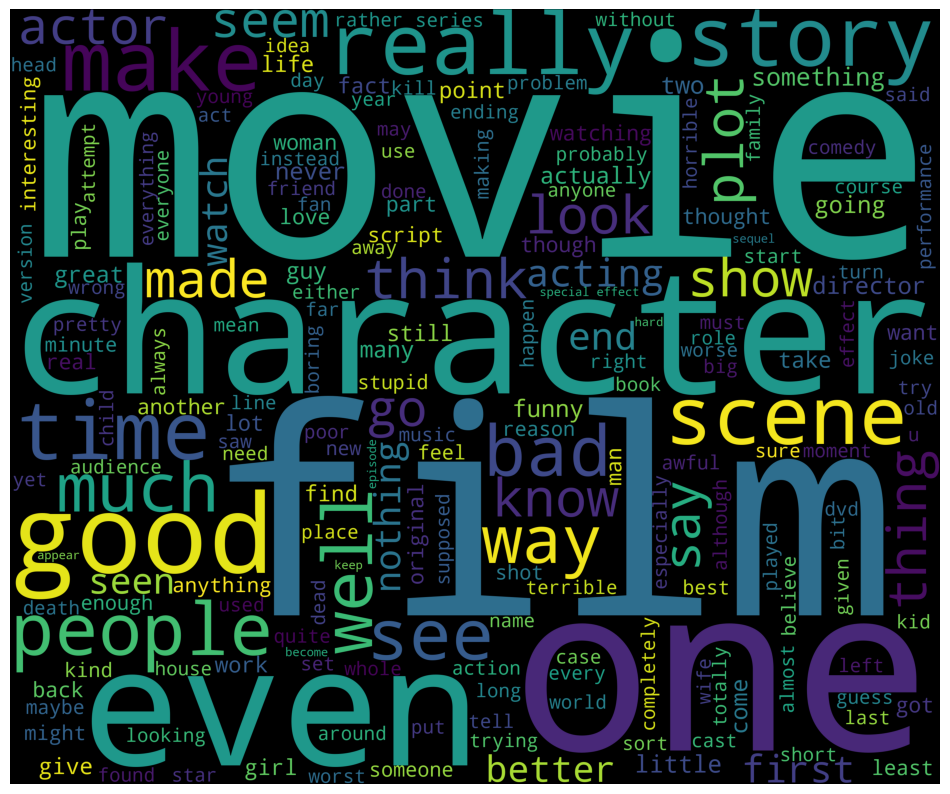

In [246]:
create_wordcloud(df, 0)

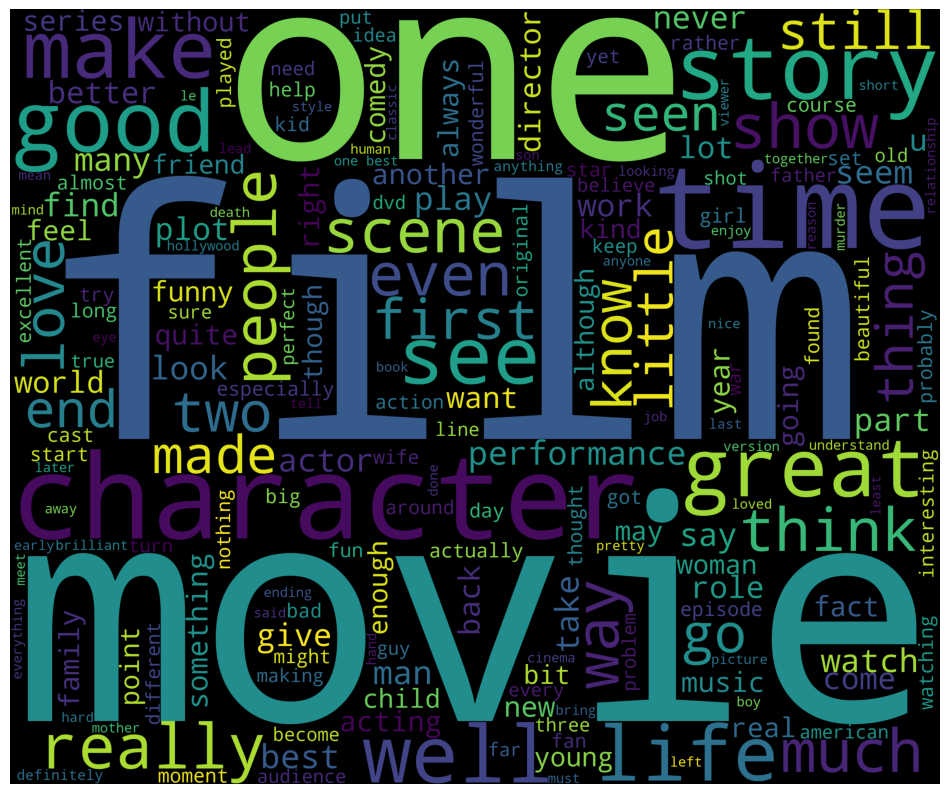

In [247]:
create_wordcloud(df, 1)

### Supervised Learning for Sentiment Analysis

#### Bag of Words (CountVectorizer)

In [130]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 100 features as number of features will increase the processing time.
count_vec = CountVectorizer(max_features=500)

data_features =count_vec.fit_transform(df['text'])

# Convert the data features to array
data_features=data_features.toarray()

In [131]:
data_features.shape

(2999, 500)

In [132]:
#Select features and target
X=data_features
y=df['label']

In [142]:
import numpy as np

# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [134]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


#### Implement Random Forest Model on BOW

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       297
           1       0.80      0.80      0.80       303

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

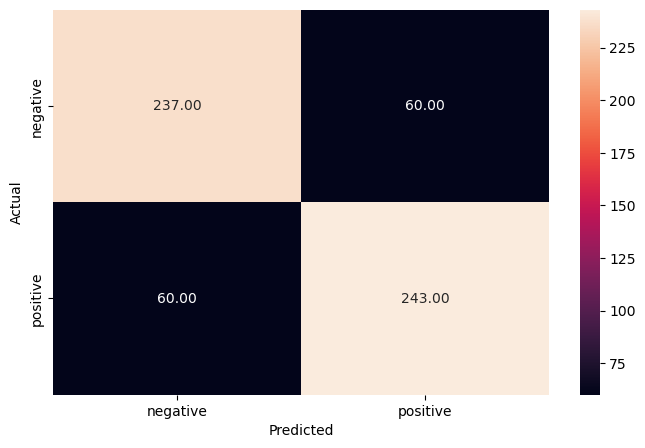

In [135]:
# Training the best model and calculating accuracy on test data 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0, n_jobs=-1)


# train the model
rf.fit(X_train, y_train)

# make predictions on the test data
ypred=rf.predict(X_test)


# check metrics
metrics_score(y_test, ypred)

In [157]:
def get_top40_words(model, all_features):
    
    # Addition of top 50 feature into top_feature after training the model
    top_features=''   

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:50]:
        top_features+=all_features[i]
        top_features+=','    

    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000, 
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 50 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

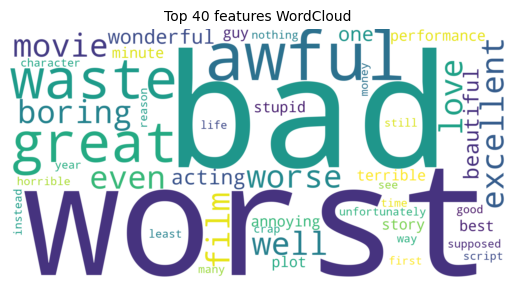

In [143]:
 #Instantiate the feature from the vectorizer
    
features = count_vec.get_feature_names_out()   

get_top40_words(rf,features)

In [177]:
# Make predictions on new text data
new_text = ['this movie is bad']
new_text_bow = count_vec.transform(new_text)
y_pred = rf.predict(new_text_bow)

print("Predicted Sentiment:", y_pred[0])

Predicted Sentiment: 0


### TF-IDF

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [149]:
# Using TfidfVectorizer to convert text data to numbers.
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf= TfidfVectorizer(max_features=500)
data_features_tfidf= tf_idf.fit_transform(df['text'])
data_features_tfidf=data_features_tfidf.toarray()

# Feature shape
data_features_tfidf.shape


(2999, 500)

In [152]:
X_tfidf=data_features_tfidf
y_tfidf=df['label']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=0)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       0.80      0.73      0.77       295
           1       0.76      0.83      0.79       305

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

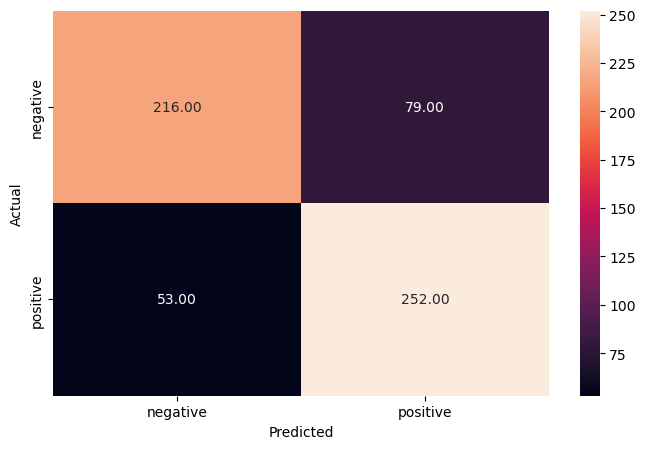

In [155]:
# Training the best model and calculating accuracy on test data 
from sklearn.ensemble import RandomForestClassifier
rf_tfidf=RandomForestClassifier(random_state=0, n_jobs=-1)


# train the model
rf_tfidf.fit(X_train, y_train)

# make predictions on the test data
ypred=rf_tfidf.predict(X_test)


# check metrics
metrics_score(y_test, ypred)

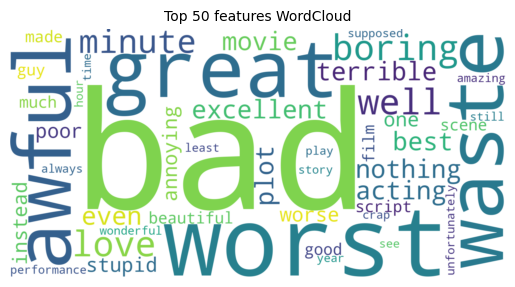

In [158]:
 #Instantiate the feature from the vectorizer
    
features = tf_idf.get_feature_names_out()   

get_top40_words(rf_tfidf,features)

In [176]:
# Make predictions on new text data
new_text = ['this movie is good and interesting']
new_text_tfidf = tf_idf.transform(new_text)
y_pred = rf_tfidf.predict(new_text_tfidf)

print("Predicted Sentiment:", y_pred[0])

Predicted Sentiment: 1


### Unsupervised Learning methods for Sentiment Analysis

#### **VADER**
**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a **lexicon** and **rule-based** sentiment analysis library or tool. It not only provides us  the Positivity and Negativity score of a sentiment, but also tells us the degree of positivity or negativity of it.

In [182]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

In [183]:
data_new = df.copy() 

In [184]:
# Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda text: sentiment.polarity_scores(text))
data_new.head()

text  \
0                                                                                                                                                                                                                                                                                                                                   word impossible led many select particular view concerning incredible task believed man could fly breath atlantic ocean many tried failed even gave life effort nevertheless done every challenge need met equal determination heart movie called spirit st louis actor chosen historic film none america james stewart convincingly play charles lindbergh although many facet lindbergh life segment featured effort first man fly across atlantic story interesting one steward fan compelling say least seeking enough fund build special aircraft fateful decision began journey gloomy day may luck lindy christened endured enormous risk featured superb film notable helped make film believable murray hamilton play bud gurney bartlett robinson ben mahoney arthur space charles watt w schultz sum total famous movie despite poor endorsement debut since become classic right well done   
1  let u honest film school project made without budget real actor passably interesting film something released dvd innocent viewer poorly produced product would idly changing channel happened catch film accidentally would probably arrest eye attention person bought dvd impression would getting proper cinematic product e film feel deeply disappointed videotaped tv play something along line old sixty serial without certain charm aside leading man mr redfield also director actor seem either chap campus bit old actually member director household appear camera without help acting couch also make artist hairdresser bonnet outgrown permanent bang top hat mullet long way creating shot using motionless mounted camera small bare studio sometimes using blue screen outdoors background synthesizer generated uninspired score lame period inspired romantic karaoke insult viewer ear one occasion film attempt dreamlike whereas fact merely conceptionless collage shot made editing believe standard high start interesting dialog every overall pretty lame two dimensional production one way flash genius either director member crew artsy film attempted look mr redfield much better job actor director   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            saying movie worse asphyxiating diarrhea generous understatement thing pathetic reprehensible piece garbage movie shmuck getting paid producer register bunch account post fake appraise watching poorly acted suspenseless snoozer movie sloth goony kill people fashion completely ignores every law physic pulling unrestrained person leg causing ripped torso idea good movie knock carbon based lifeform functioning occipital lobe would consider million eon movie scary entertaining   
3                                                                                                                                                                                                                                                                                                                                                                                                             

In [185]:
# Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

In [186]:
# Classify the class of the review by keeping threshold on the compund score

data_new['comp_score'] = data_new['compound'].apply(lambda c: 1 if c >=0 else 0)

In [187]:
data_new.head()

text  \
0                                                                                                                                                                                                                                                                                                                                   word impossible led many select particular view concerning incredible task believed man could fly breath atlantic ocean many tried failed even gave life effort nevertheless done every challenge need met equal determination heart movie called spirit st louis actor chosen historic film none america james stewart convincingly play charles lindbergh although many facet lindbergh life segment featured effort first man fly across atlantic story interesting one steward fan compelling say least seeking enough fund build special aircraft fateful decision began journey gloomy day may luck lindy christened endured enormous risk featured superb film notable helped make film believable murray hamilton play bud gurney bartlett robinson ben mahoney arthur space charles watt w schultz sum total famous movie despite poor endorsement debut since become classic right well done   
1  let u honest film school project made without budget real actor passably interesting film something released dvd innocent viewer poorly produced product would idly changing channel happened catch film accidentally would probably arrest eye attention person bought dvd impression would getting proper cinematic product e film feel deeply disappointed videotaped tv play something along line old sixty serial without certain charm aside leading man mr redfield also director actor seem either chap campus bit old actually member director household appear camera without help acting couch also make artist hairdresser bonnet outgrown permanent bang top hat mullet long way creating shot using motionless mounted camera small bare studio sometimes using blue screen outdoors background synthesizer generated uninspired score lame period inspired romantic karaoke insult viewer ear one occasion film attempt dreamlike whereas fact merely conceptionless collage shot made editing believe standard high start interesting dialog every overall pretty lame two dimensional production one way flash genius either director member crew artsy film attempted look mr redfield much better job actor director   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            saying movie worse asphyxiating diarrhea generous understatement thing pathetic reprehensible piece garbage movie shmuck getting paid producer register bunch account post fake appraise watching poorly acted suspenseless snoozer movie sloth goony kill people fashion completely ignores every law physic pulling unrestrained person leg causing ripped torso idea good movie knock carbon based lifeform functioning occipital lobe would consider million eon movie scary entertaining   
3                                                                                                                                                                                                                                                                                                                                                                                                             

In [169]:
#df["VADER_pred"] = data_new['comp_score'].tolist()

              precision    recall  f1-score   support

           0       0.79      0.47      0.59      1485
           1       0.63      0.87      0.73      1514

    accuracy                           0.67      2999
   macro avg       0.71      0.67      0.66      2999
weighted avg       0.71      0.67      0.66      2999



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

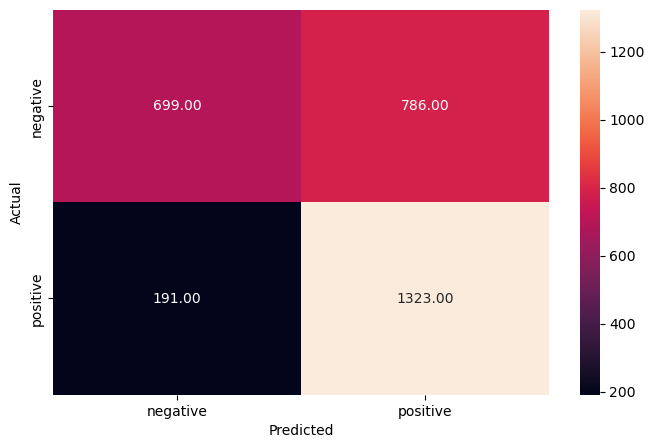

In [188]:
# Calculate the accuracy of the Vader Sentiment Analysis
# data["sentiment"] = data["sentiment"].astype(int)   #convert the sentiment column values into int data type

# data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type

# metrics_score(data["sentiment"], data["VADER_pred"])

metrics_score(data_new["label"], data_new["comp_score"])

#### **TextBlob**

In [203]:
from textblob import TextBlob

In [209]:
data_new = df.copy()      # make a copy of dataframe and do unsupervised operations on that dataframe

In [210]:
# Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [211]:
# Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: 1 if c >=0.1 else 0)


In [212]:
#data["Text_Blob_pred"] = data_new['polarity_score'].tolist()

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1485
           1       0.77      0.78      0.77      1514

    accuracy                           0.77      2999
   macro avg       0.77      0.77      0.77      2999
weighted avg       0.77      0.77      0.77      2999



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

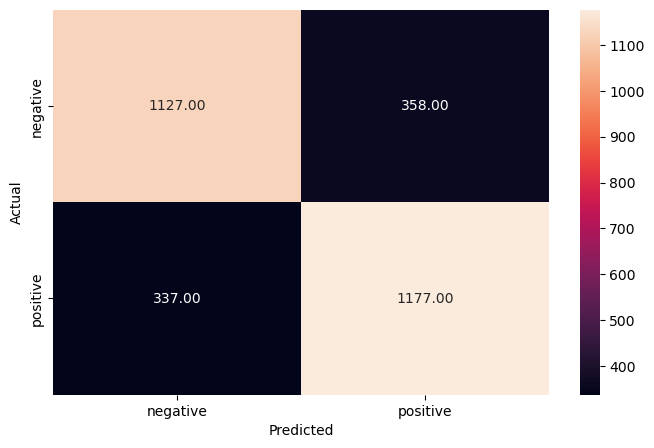

In [213]:
# Calculate the accuracy of the Vader Sentiment Analysis
# data["sentiment"] = data["sentiment"].astype(int)  #convert the sentiment column values into int data type

# data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type

# metrics_score(data["sentiment"], data["Text_Blob_pred"])
metrics_score(data_new["label"], data_new["polarity_score"])

### Word2Vec

In [214]:
### Import the word2vec from gensim models
from gensim.models import Word2Vec

In [248]:
data=df.copy()
data.head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   wife received ticket family attend premier movie employer free regret price popcorn two hour life wasted garbage film dvd original mask quite enjoyed expected remake nowhere near original production value writing prepared vulgar pile trash weak acting poor plot bad cgi baby passing gas urinating hyper mask mode woman turned giant nose spewing mucous fun huh eight year old son love movie like lord ring harry potter star war asked thought exact word hated like scooby doo movie take something good put gross stuff twelve year old daughter wife hated well wife later told son asker twice could leave never done proud lest think kind puritan groan lack laughter heard theater think patron agreed film represents everything bad child entertainment today positive review must people financially connected film   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             hit south southwest sxsw film festival austin last year feature fine cast headed e r gloria reuben scenery chewing john glover though shot small budget nyc film look sound fabulous take u behind scene whirl rehearsal mounting actor call scottish play reference word macbeth thought bring play ancient curse acting company exhibit emotion play lust jealousy rage suspicion bit fun well game begin accomplished actor replaced lead role well known pretty face tv soap opera scene order draw bigger crowd green eyed monster take drama unfolds nicely fine soundtrack good performance around dvd includes director commentary deleted scene well   
2  special day ettore scola italy canada every come across film really touch nerve one offer simple premise almost flawlessly executed every way incredibly moving time surprising ettore scola una giornate particulare relatively unheralded even hated critic time call rubbish leonard maltin somewhat milder pleasant trifling disagree film deeply moving within simple story show u insight daily life fascist italy film seen cinematography distinctly unflashy even bit bland storyline straightforward might explain film relative unpopularity considering late audience exactly spoiled great italian film even stranger one really catch cri

In [249]:
# Get the list of all the sentences in the data
word_list= [sentence.split() for sentence in df['text']]
word_list[:1]

[['wife',
  'received',
  'ticket',
  'family',
  'attend',
  'premier',
  'movie',
  'employer',
  'free',
  'regret',
  'price',
  'popcorn',
  'two',
  'hour',
  'life',
  'wasted',
  'garbage',
  'film',
  'dvd',
  'original',
  'mask',
  'quite',
  'enjoyed',
  'expected',
  'remake',
  'nowhere',
  'near',
  'original',
  'production',
  'value',
  'writing',
  'prepared',
  'vulgar',
  'pile',
  'trash',
  'weak',
  'acting',
  'poor',
  'plot',
  'bad',
  'cgi',
  'baby',
  'passing',
  'gas',
  'urinating',
  'hyper',
  'mask',
  'mode',
  'woman',
  'turned',
  'giant',
  'nose',
  'spewing',
  'mucous',
  'fun',
  'huh',
  'eight',
  'year',
  'old',
  'son',
  'love',
  'movie',
  'like',
  'lord',
  'ring',
  'harry',
  'potter',
  'star',
  'war',
  'asked',
  'thought',
  'exact',
  'word',
  'hated',
  'like',
  'scooby',
  'doo',
  'movie',
  'take',
  'something',
  'good',
  'put',
  'gross',
  'stuff',
  'twelve',
  'year',
  'old',
  'daughter',
  'wife',
  'hated'

In [250]:
len(word_list)

2998

In [251]:
wordvec=Word2Vec(word_list, sg=1)

In [257]:
vocab=wordvec.wv.key_to_index

In [258]:
len(vocab)

8029

In [255]:
wordvec.wv.similar_by_word('happy')

[('guilty', 0.9417939782142639),
 ('sad', 0.9377915859222412),
 ('dislike', 0.9330350160598755),
 ('upset', 0.9327776432037354),
 ('finish', 0.926486074924469),
 ('touched', 0.9252389669418335),
 ('pain', 0.9240041971206665),
 ('anyways', 0.9222954511642456),
 ('impossible', 0.922150731086731),
 ('decision', 0.9197443723678589)]

In [256]:
wordvec.wv.similar_by_word('horrible')

[('terrible', 0.9392879009246826),
 ('awful', 0.930853545665741),
 ('pathetic', 0.9138880372047424),
 ('atrocious', 0.9028520584106445),
 ('laughable', 0.8981517553329468),
 ('suck', 0.889279305934906),
 ('forgettable', 0.8861611485481262),
 ('incredibly', 0.8824935555458069),
 ('absolutely', 0.8821542859077454),
 ('horrendous', 0.881738543510437)]

In [261]:
def get_embeddings(model, words, vocab):
    embeddings=[]
    for word in words:
        if word in vocab:
            embeddings.append(model.wv[word])
    if len(embeddings)==0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(embeddings, axis=0)
def word_vectorizer(model, corpus):
    vocab=set(model.wv.key_to_index)
    features=[get_embeddings(model, tokenized_sentence, vocab) for tokenized_sentence in corpus]
    return np.array(features)

In [262]:
feature_array=word_vectorizer(wordvec, word_list)

In [266]:
import pandas as pd
pd.DataFrame(feature_array)

0         1         2         3         4         5         6   \
0    -0.194429  0.061835  0.014132  0.101519  0.067143 -0.246072  0.005020   
1    -0.193350  0.077361  0.066165  0.040109  0.079401 -0.296586  0.019127   
2    -0.198944  0.068858  0.071948  0.115404  0.046178 -0.305173  0.010449   
3    -0.211714  0.066727  0.040249  0.078166  0.060497 -0.274455  0.008243   
4    -0.219226  0.072031  0.048558  0.102287  0.064911 -0.247096  0.007332   
...        ...       ...       ...       ...       ...       ...       ...   
2993 -0.210816  0.061217  0.065956  0.133226  0.031332 -0.263409  0.021583   
2994 -0.202304  0.036978  0.077078  0.074810  0.054543 -0.295588 -0.002009   
2995 -0.191108  0.069735  0.058085  0.061941  0.069633 -0.324409  0.028262   
2996 -0.192725  0.082090  0.064857  0.152297  0.037241 -0.271079  0.017386   
2997 -0.174023  0.061003  0.070342  0.068546  0.041307 -0.272276  0.051548   

            7         8         9   ...        90        91        92  \
0     0.484329 -0.206003 -0.085771  ...  0.310295  0.212968  0.077567   
1     0.458409 -0.097216 -0.073787  ...  0.312515  0.202105  0.020907   
2     0.451465 -0.199123 -0.056637  ...  0.281523  0.187636  0.069027   
3     0.449580 -0.178450 -0.081765  ...  0.286633  0.212887  0.066557   
4     0.463626 -0.137963 -0.074794  ...  0.267094  0.205441  0.045124   
...        ...       ...       ...  ...       ...       ...       ...   
2993  0.443435 -0.196064 -0.090802  ...  0.282533  0.215654  0.063877   
2994  0.536064 -0.176608 -0.074758  ...  0.345377  0.202867  0.122575   
2995  0.468782 -0.181277 -0.086852  ...  0.292302  0.204564  0.061641   
2996  0.457503 -0.180926 -0.048476  ...  0.248907  0.176257  0.071041   
2997  0.459795 -0.160398 -0.108245  ...  0.284282  0.227983  0.055596   

            93        94        95        96        97        98        99  
0     0.113023  0.301665  0.203240  0.102677 -0.185302  0.068679  0.025225  
1     0.052514  0.251454  0.156282  0.084073 -0.219834  0.038023  0.085505  
2     0.102741  0.288997  0.198758  0.102197 -0.202170  0.050187  0.052218  
3     0.097295  0.278198  0.187696  0.089318 -0.195076  0.063560  0.062235  
4     0.113952  0.266063  0.180733  0.084074 -0.210064  0.055968  0.058358  
...        ...       ...       ...       ...       ...       ...       ...  
2993  0.102386  0.308718  0.194051  0.102124 -0.184894  0.067851  0.013725  
2994  0.069631  0.288711  0.181514  0.087615 -0.179474  0.014191  0.024385  
2995  0.102080  0.266747  0.206367  0.085438 -0.205738  0.031348  0.062961  
2996  0.125547  0.320227  0.197668  0.093435 -0.216820  0.056411  0.015946  
2997  0.089079  0.306754  0.198887  0.072348 -0.211207  0.038920  0.034885  

[2998 rows x 100 columns]

In [267]:
X=feature_array
y=df['label']

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [268]:
rf_word2vec= RandomForestClassifier(random_state=0)

In [270]:
rf_word2vec.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(random_state=0)

In [271]:
y_pred=rf_word2vec.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       295
           1       0.76      0.83      0.79       305

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

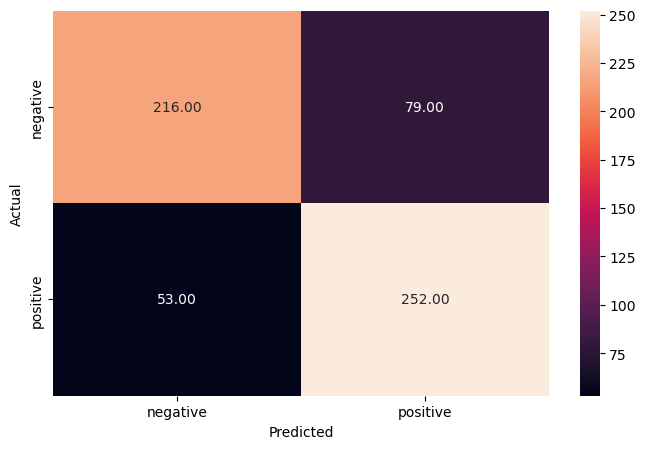

In [273]:
metrics_score(y_test, y_pred)

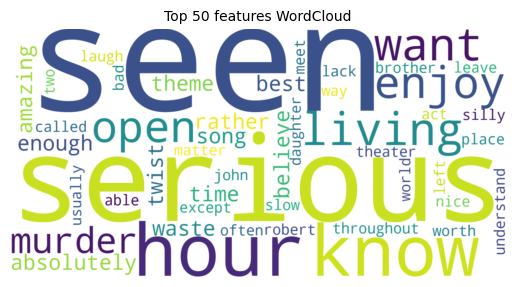

In [276]:
 #Instantiate the feature from the vectorizer
    
features = wordvec.wv.index_to_key 

get_top40_words(rf_word2vec,features)

In [2]:
from utils import sentiment_preprocess

Processing Remove Duplicates...
Remove Duplicates Done
Processing Text Preprocessing...
Processing Remove HTML...


C:\Users\USER\Desktop\NLP project\utils.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


Remove HTML Done
Processing Remove special characters...
Remove special characters Done
Processing Convert to lowercase...
Convert to lowercase Done
Processing Tokenize...
Tokenize Done
Processing Remove stopwords...
Remove stopwords Done
Processing Lemmatize...
Lemmatize Done
Processing Join words...
Join words Done
Text Preprocessing Done


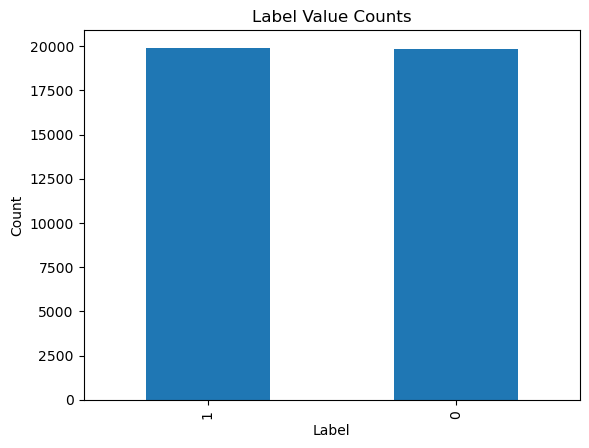

Label value counts:
label
1    19908
0    19815
Name: count, dtype: int64
Negative Reviews


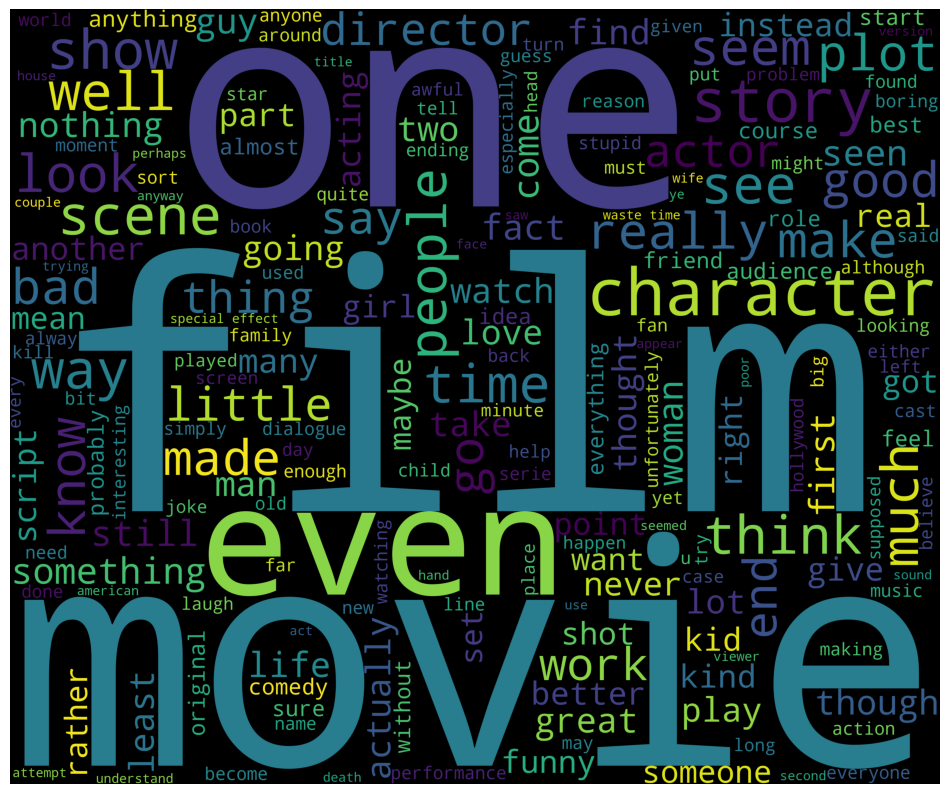

Create Word Cloud Done
Positive Reviews


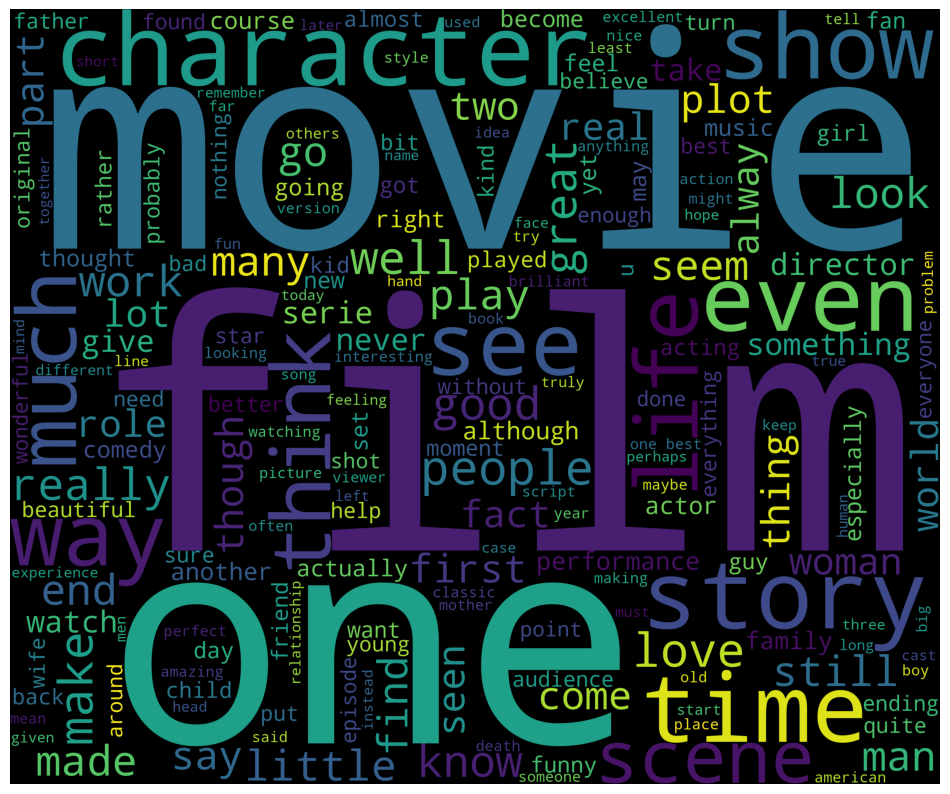

Create Word Cloud Done


In [3]:
df= sentiment_preprocess('movie.csv')

In [6]:
df

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      grew b watching loving thunderbird mate school watched played thunderbird school lunch school wanted virgil scott one wanted alan counting became art form took child see movie hoping would get glimpse loved child bitterly disappointing high point snappy theme tune could compare original score thunderbird thankfully early saturday morning one television channel still play rerun series gerry anderson wife created jonatha frakes hand director chair version completely hopeless waste film utter rubbish cgi remake may acceptable replacing marionette homo sapiens subsp sapiens huge error judgment   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  put movie dvd player sat coke chip expectation hoping movie would contain strong point first movie awsome animation good flowing story excellent voice cast funny comedy kick as soundtrack disappointment found atlantis milo return read review first might let following paragraph directed seen first movie enjoyed primarily point mentioned first scene appears shock picked atlantis milo return display case local videoshop whatever expectation music feel bad imitation first movie voice cast replaced fitting one exception character like voice sweet actual drawing bad animation particular sad sight storyline also pretty weak like three episode schooby doo single adventurous story got last time misunderstand good schooby doo episode laugh single time although might sniggered twice audience seen first movie especially care similar sequel fast review movie stand alone product liked schooby doo might like movie could still enjoy movie nothing else suspect might good kid movie would know might be